# Training plots for TSP

In [1]:
from tensorboard.backend.event_processing import event_accumulator
from pprint import pp, pprint
from sys import argv
import matplotlib.pyplot as plt
import numpy as np
import glob

figsize = (10, 6)
dpi = 100

In [2]:
logs = glob.glob('mylogs/**/events.out.*', recursive=True)
names = [l.replace('\\','/').split('/')[-2] for l in logs]
eas = [event_accumulator.EventAccumulator(l) for i,l in enumerate(logs) if 'coord' in names[i] and 'dist' not in names[i]]

for ea in eas:
    ea.Reload()

## Linear scale

AM_coord 5000
AM_coord_dist 5000


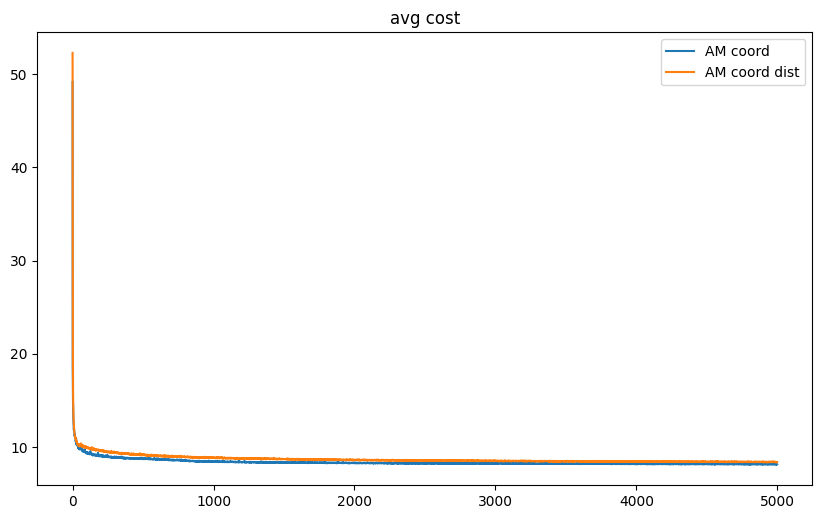

AM_coord 5000
AM_coord_dist 5000


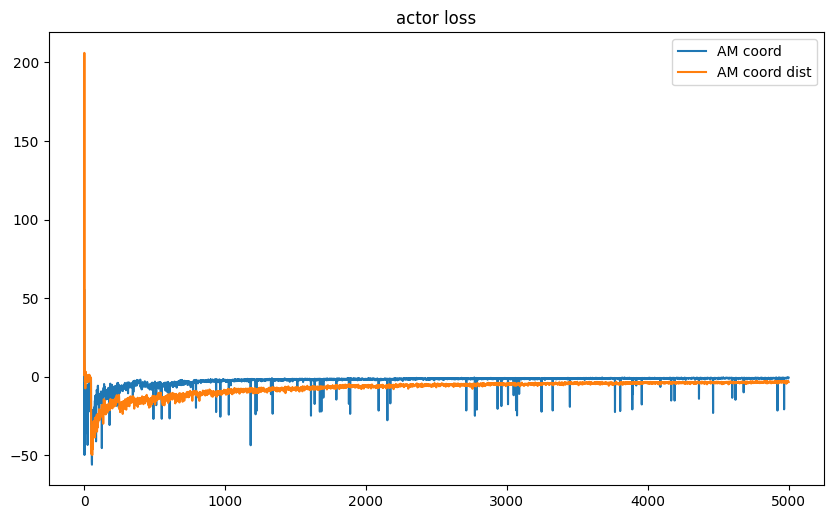

AM_coord 5000
AM_coord_dist 5000


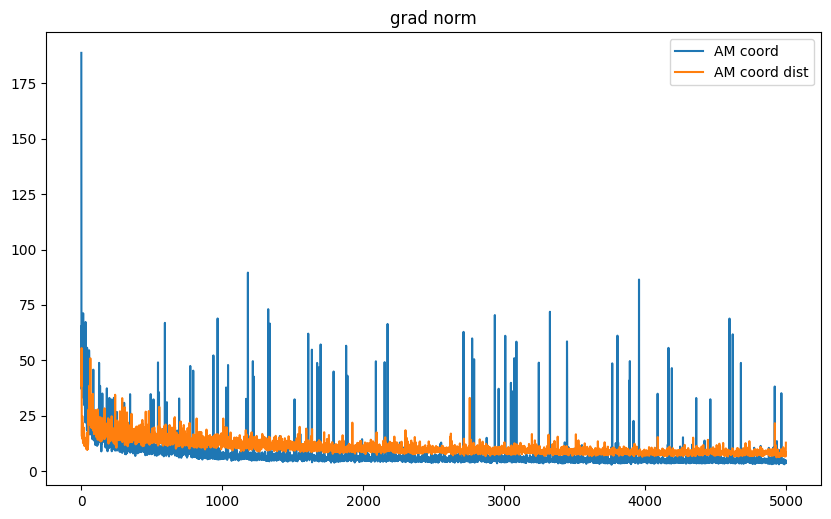

AM_coord 100
AM_coord_dist 100


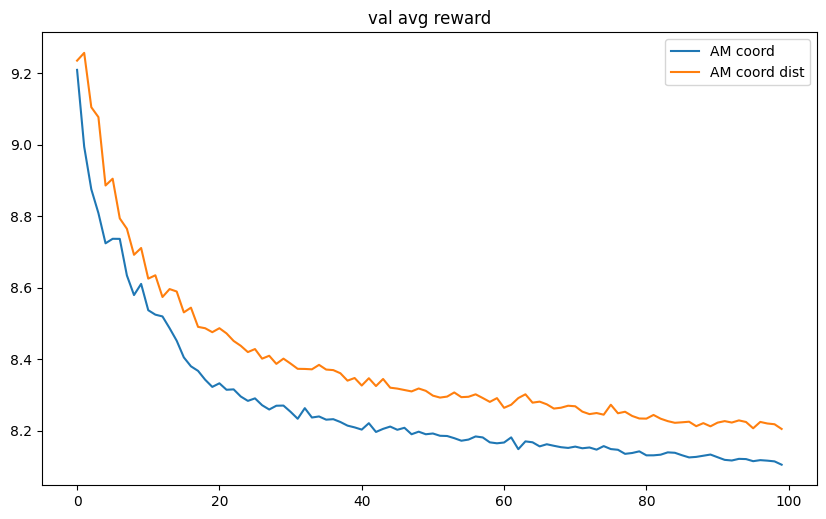

In [3]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.plot(serie, label=names[i].replace('_', ' '))

        print(names[i], len(serie))
        
    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Linear scale (y limited $\mu \pm 3\delta$)

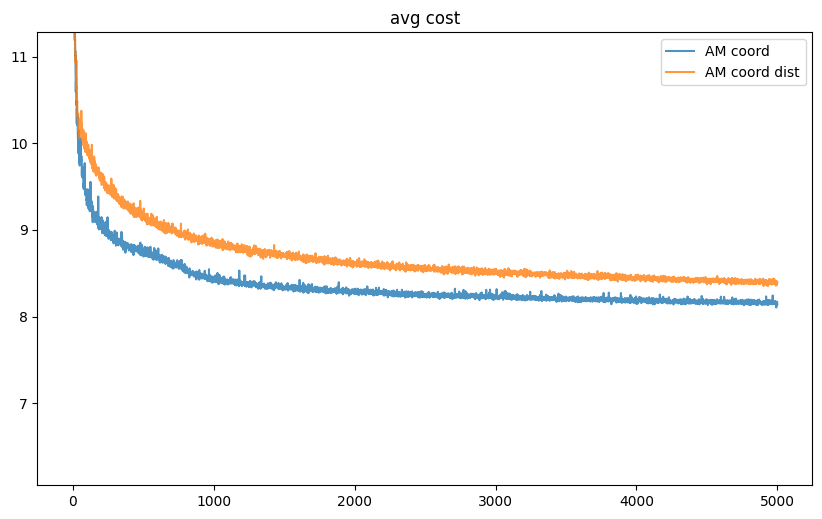

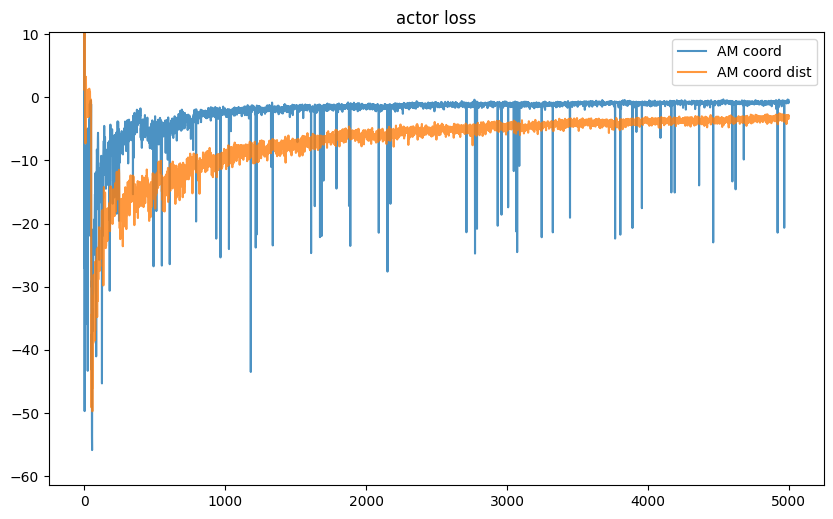

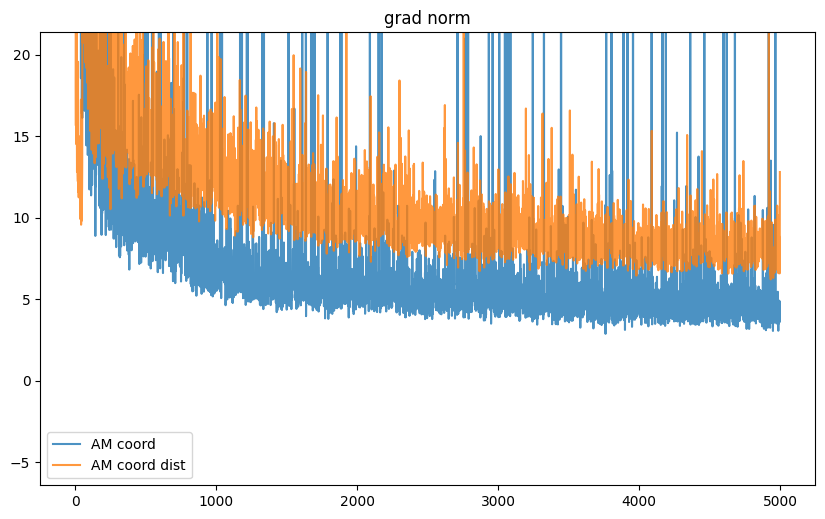

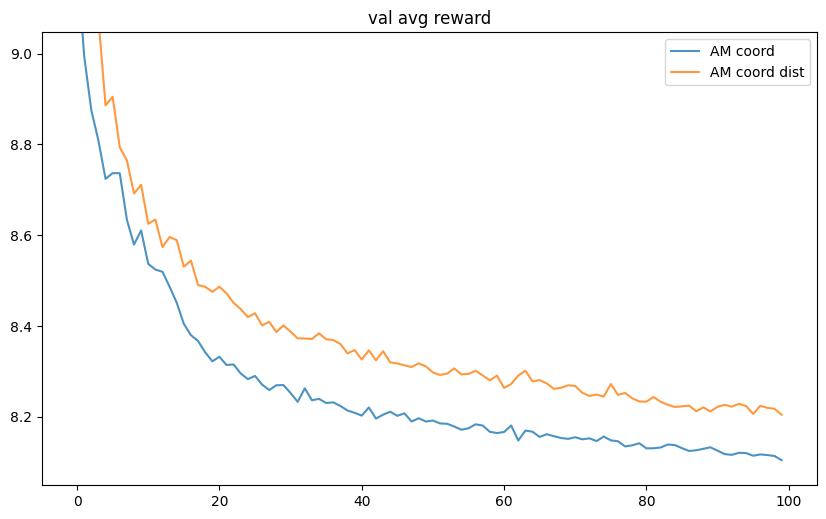

In [4]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.plot(serie, label=names[i].replace('_', ' '), alpha=0.8)
        
        # reduce y lim with mean +- 2*std
        mean = np.mean(serie)
        std = np.std(serie)
        plt.ylim(top=mean+3*std)

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Log scale

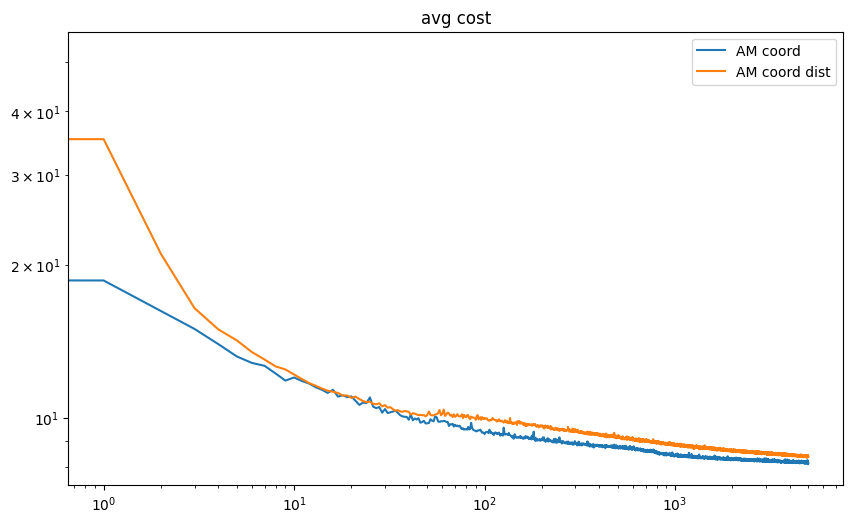

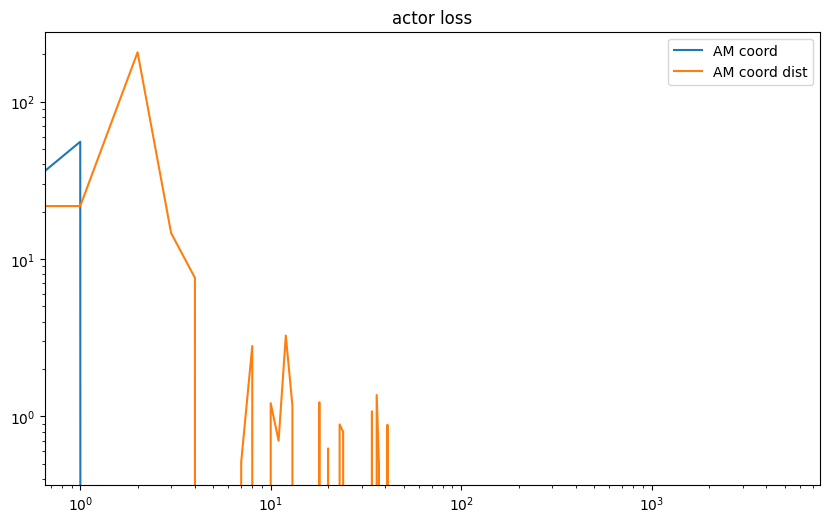

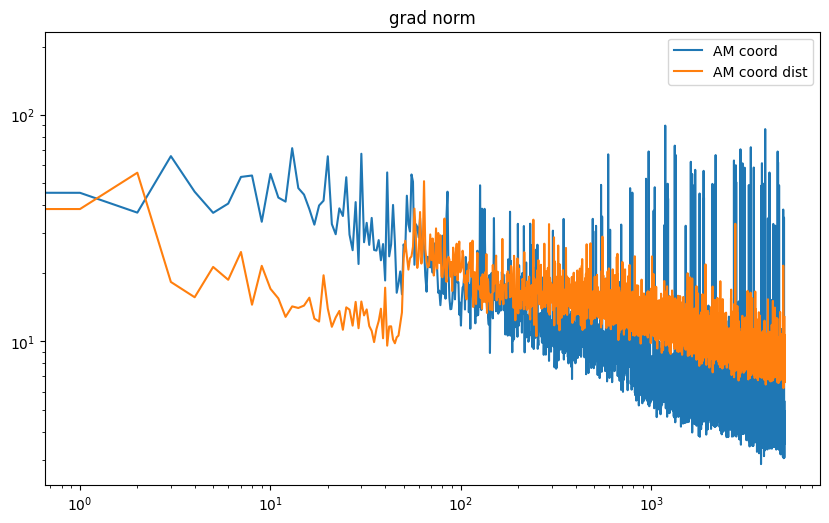

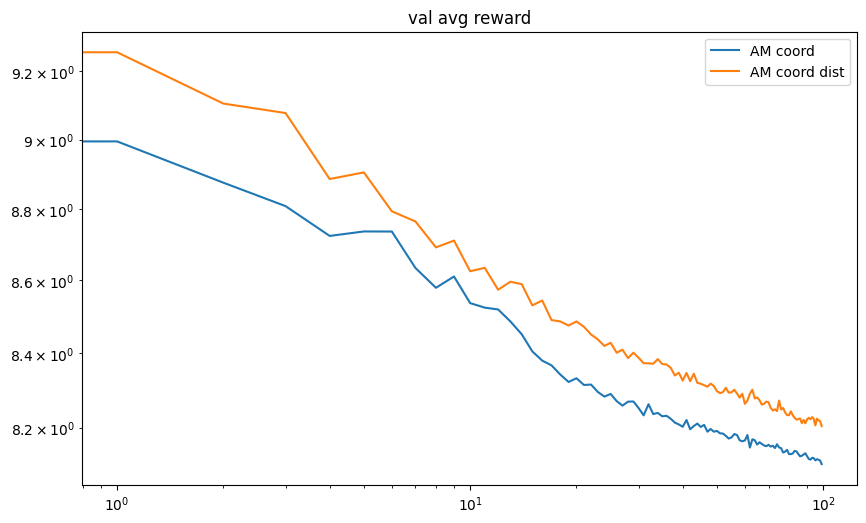

In [5]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)
    ax = plt.gca()

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.loglog(serie, label=names[i].replace('_', ' '))

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()
        

## Interrupted run

In [8]:
batch_size = 512
epoch_size = 1280000
num_epochs = 100
log_step = 50

print('n batches', num_epochs*epoch_size/batch_size/log_step)

done_batches = int(97*epoch_size/batch_size/log_step)
print('done batches', done_batches)
remaining_batches = int((num_epochs-97)*epoch_size/batch_size/log_step)
print('remaining_batches', remaining_batches)

n batches 5000.0
done batches 4850
remaining_batches 150


BERT_seed_42_20220730T234410 5000


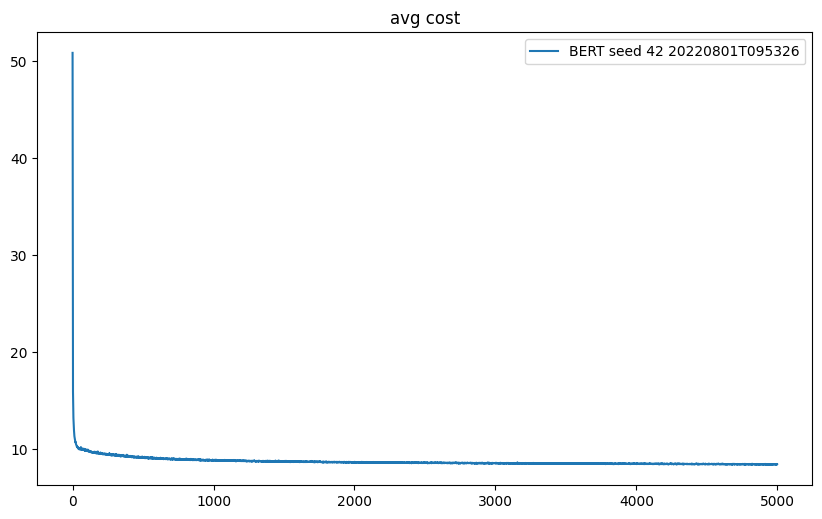

BERT_seed_42_20220730T234410 5000


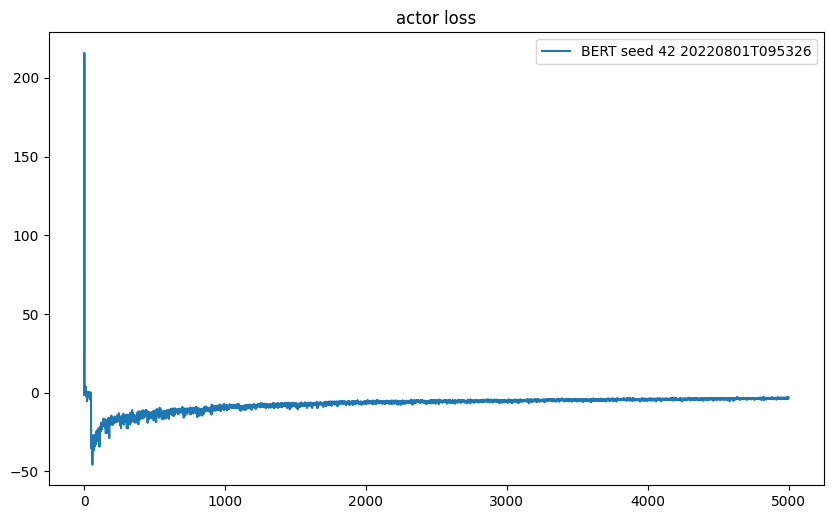

BERT_seed_42_20220730T234410 5000


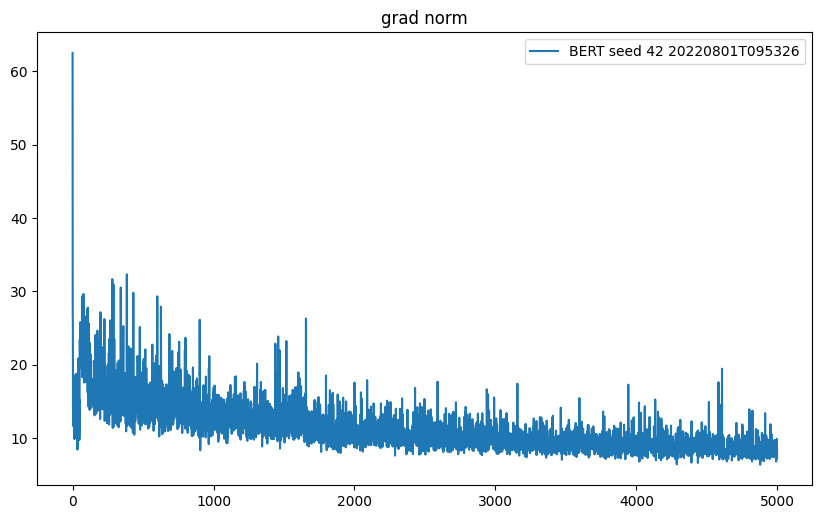

In [9]:
d = {event_accumulator.EventAccumulator(l): names[i] for i,l in enumerate(logs) if 'BERT_seed' in names[i]}
eas = list(d.keys())
names_ = list(d.values())

for ea in eas:
    ea.Reload()

for serie_name in ['avg_cost', 'actor_loss', 'grad_norm']:

    plt.figure(figsize=figsize, dpi=dpi)

    serie = [e.value for e in eas[0].Scalars(serie_name)][:done_batches] + \
            [e.value for e in eas[1].Scalars(serie_name)][:remaining_batches]
    plt.plot(serie, label=names_[i].replace('_', ' '))

    print(names_[0], len(serie))
        
    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()